In [2]:
%matplotlib inline
#ESC + Z para recuperar celdas borradas!!!!!!!!!!

In [158]:
file = 'Sample_3_v88.pdf'
type(file)

str

file = 'Sample_3_v88.pdf'
type(file) 

In [20]:
df = tb.read_pdf(file, pages = '3', area = (300, 0, 600, 800), columns = [200, 200, 0, 300])

In [14]:
print(df)

[   Unnamed: 0      2022.09(005)). Los datos aquí presentados  Unnamed: 1  \
0         NaN     pero puede que no sean exhaustivos. La inf         NaN   
1         NaN        de NCCN se obtuvo en www.nccn.org con f         NaN   
2         NaN     con fecha de 2022-08-17. La información de         NaN   
3         NaN     ensayos clínicos tiene fecha de 2022-08-01         NaN   
4         NaN     www.clinicaltrials.gov por ID NCT o busque         NaN   
5         NaN  identificadores". Las variantes se indican de         NaN   
6         NaN   (Li et al. 2017). Basándose en las fuentes d         NaN   
7         NaN     informe se enumeran en orden de posible re         NaN   

      proceden de una base de  \
0     ormación de FDA se obtu   
1   echa de 2022-08-01. La in   
2        ESMO se obtuvo en ww   
3   . Para obtener informació   
4  en el sitio web de referen   
5      acuerdo con la nomencl   
6   e datos seleccionadas, la   
7    levancia clínica pero no   

  conocimientos 

In [51]:
df = df.apply(lambda x: 1 if re.findall('^[A-Z].*[a-z]$', str(x[0])) else 0, axis = 1)

NameError: name 'df' is not defined

In [6]:
df['row'] = df['border'].transform('cumsum')

TypeError: list indices must be integers or slices, not str

In [5]:
!pip install pypdf2 --upgrade

Requirement already up-to-date: pypdf2 in c:\users\luciv\anaconda3\lib\site-packages (3.0.1)


In [1]:
import pypdf2

ModuleNotFoundError: No module named 'pypdf2'

In [2]:
import fitz  # Esta es la librería pymupdf que habéis instalado
import re
import pandas
import matplotlib.pyplot as plt

CÓDIGO PRUEBA

In [251]:
chip_Data = [] #carpeta
paciente_Data = [] #carpeta
fecha_Data = []
NHC_Data = []
Nbiopsia_Data = []
biopsia_Data = []
texto_Data = []
mutaciones_Data = []
frecuencia_Data = []
NM_Data = []
espe_Data = []
farmaco_Data = []
ensayo_Data = []
BM_Data = []
Ndiagnostico_Data = []

with fitz.open("Sample_3_v88.pdf") as doc:
    text = ""
    for page in doc:
        text = text + page.get_text()

In [32]:
lines = text.split('\n')
print(lines)
type(lines)

['Servicio de Anatomía Patológica', 'Laboratorio de Patología Molecular', 'Tel. 947 256 533 ext. 35517', 'Datos paciente: NHC: ', 'Nº biopsia: ', 'Fecha: 16-sep-2022', '1 de 3', 'Tipo de cáncer de la muestra: Carcinoma pulmonar no microcítico', 'Resultados del informe', '1 Biomarcadores relevantes', '3 Tratamientos disponibles', '5 Ensayos clínicos', 'Biomarcadores relevantes', 'Nivel', 'Alteración genómica', 'Tratamientos relevantes', '(En este tipo de cáncer)', 'Tratamientos relevantes', '(En otro tipo de cáncer)', 'Ensayos', 'clínicos', 'IIC', 'BRAF p.(N581S) c.1742A>G', 'B-Raf proto-oncogene, serine/threonine kinase', 'Frecuencia de alelo: 36.65%', 'Ninguno', 'dabrafenib', 'ipilimumab + nivolumab', 'vemurafenib', '5', 'Fuentes de datos públicos incluidas en tratamientos pertinentes:\xa0FDA1, NCCN, EMA2, ESMO', 'Gen', 'Cambio de', 'aminoácidos', 'Codificación', 'Exón', 'Frecuencia', 'de alelo', 'Locus', 'Transcripto', 'ID de la variante', 'Efecto de la', 'variante', 'ClinVar1', 'BRA

list

In [7]:
lines[1]

'Laboratorio de Patología Molecular'

In [8]:
lines[3]

'Datos paciente: NHC: '

In [18]:
# NHC
NHC = [1 if re.search('NHC:', line) else 0 for line in lines]
NHC = [i for i, s in enumerate(NHC) if s==1 in NHC]

NHC_Data = []
#if NHC.len > 0:
    #NHC_Data.append(lines[0][lines[0].rfind('NHC')+4:].strip())
    
for i in NHC:
    NHC_Data.append(lines[i][lines[i].rfind('NHC')+4:].strip())
print(NHC_Data)

NHC

['', '', '']


[3, 125, 210]

In [27]:
#Nº Biopsia
Nbiopsia = [1 if re.search('biopsia:', line) else 0 for line in lines]
Nbiopsia = [i for i, s in enumerate(Nbiopsia) if s==1 in Nbiopsia]

Nbiopsia_Data = []
biopsia_Data = [] #depende de la última letra del número de biopsia (B=BIOPSIA, C=CITOLOGIA, P=PUNCION)
for i in Nbiopsia:
    Nbiopsia_Data.append(lines[i][lines[i].rfind('biopsia')+11:].strip())
    #biopsia_Data.append(lines[i][lines[i].rfind('biopsia')+16:].strip())
print(Nbiopsia_Data)
#print(biopsia_Data)

Nbiopsia
#biopsia

['', '', '']


[4, 126, 211]

In [17]:
#Fecha
fecha = [1 if re.search('Fecha:', line) else 0 for line in lines]
fecha = [i for i, s in enumerate(fecha) if s==1 in fecha]

fecha_Data = []
for i in fecha:
    fecha_Data.append(lines[i][lines[i].rfind('Fecha')+7:].strip())
    #print(lines[i][lines[i].rfind('Fecha')+7:].strip())
print(fecha_Data)

fecha

['16-sep-2022', '16-sep-2022', '16-sep-2022']


[5, 127, 212]

In [57]:
#Diagnóstico
textoDiag = [1 if re.search('de la muestra:', line) else 0 for line in lines]
textoDiag = [i for i, s in enumerate(textoDiag) if s==1 in textoDiag]

textoDiag_Data = []
for i in textoDiag:
    textoDiag_Data.append(lines[i][lines[i].rfind('de la muestra:')+14:].strip())
    #print(lines[i][lines[i].rfind('muestra')+9:])
print(textoDiag_Data)

textoDiag

['Carcinoma pulmonar no microcítico']


[7]

In [43]:
#Frecuencia alélica NO QUIERO EL % AL IMPRIMIR EL VALOR!!!!!
frecuencia = [1 if re.search('alelo:', line) else 0 for line in lines]
frecuencia = [i for i, s in enumerate(frecuencia) if s==1 in frecuencia]

frecuencia_Data = []
for i in frecuencia:
    frecuencia_Data.append(lines[i][lines[i].rfind('alelo')+7:].strip())
    #print(lines[i][lines[i].rfind('alelo')+7:].strip())
print(frecuencia_Data)

frecuencia

['36.65%']


[24]

In [56]:
#Ensayos clínicos QUIERO TODO EL CONJUNTO, NO SOLO LA PRIMERA COLUMNA!!!!!
ensayo = [1 if re.search('NCT', line) else 0 for line in lines]
ensayo = [i for i, s in enumerate(ensayo) if s==1 in ensayo]

ensayo_Data = []
for i in ensayo:
    ensayo_Data.append(lines[i][lines[i].rfind('NCT')+1:].strip())
    #print(lines[i][lines[i].rfind('de los ensayos clínicos')+30:].strip())
print(ensayo_Data)

ensayo


['CT', 'CT04620330', 'CT04418661', 'CT04589845', 'CT04913285', 'CT03520075', 'CT o busque en el sitio web de referencia de ensayos clínicos segun identificador local en "Otros']


[172, 175, 180, 184, 188, 193, 227]

In [60]:
#Mutaciones NO FUNCIONA!
mutaciones = [1 if re.search('likely', line) else 0 for line in lines]
mutaciones = [i for i, s in enumerate(mutaciones) if s==1 in mutaciones]

mutaciones_Data = []
for i in mutaciones:
    mutaciones_Data.append(lines[i][lines[i].rfind('likely')].strip())
print(mutaciones_Data)

mutaciones

[]


[]

In [61]:
#Número mutaciones FALTA POR DETERMINAR
NM_Data = []
NM = [1 if re.search('likely', line) else 0 for line in lines]
NM = [i for i, s in enumerate(NM) if s==1 in NM]

NM_Data = []
for i in mutaciones:
    NM_Data.append(lines[i][lines[i].rfind('likely')].strip())
print(NM_Data)

NM

[]


[]

In [ ]:
#Tipo mutación específico EXTRA 
mutaciones = [1 if re.search('likely', line) else 0 for line in lines]
mutaciones = [i for i, s in enumerate(mutaciones) if s==1 in mutaciones]

mutaciones_Data = []
for i in mutaciones:
    mutaciones_Data.append(lines[i][lines[i].rfind('likely')].strip())
print(mutaciones_Data)

mutaciones

In [ ]:
#Fármaco aprobado FALTA POR DETERMINAR
farmaco = [1 if re.search('likely', line) else 0 for line in lines]
farmaco = [i for i, s in enumerate(farmaco) if s==1 in farmaco]

farmaco_Data = [] = []
for i in mutaciones:
    farmaco_Data.append(lines[i][lines[i].rfind('likely')].strip())
print(farmaco_Data = [])

farmaco

In [62]:
#Beligno maligno EXTRA
BM = [1 if re.search('likely', line) else 0 for line in lines]
BM = [i for i, s in enumerate(BM) if s==1 in BM]

BM_Data = []
for i in BM:
    BM_Data.append(lines[i][lines[i].rfind('likely')].strip())
print(BM_Data)

BM

[]


[]

In [63]:
#Número diagnóstico
Ndiagnostico = [1 if re.search('likely', line) else 0 for line in lines]
Ndiagnostico = [i for i, s in enumerate(Ndiagnostico) if s==1 in Ndiagnostico]

Ndiagnostico_Data = []
for i in Ndiagnostico:
    Ndiagnostico_Data.append(lines[i][lines[i].rfind()].strip())
print(Ndiagnostico_Data)

Ndiagnostico

[]


[]

CÓDIGO ADICIONAL QUE NOS IMPRIME EL PDF EN IMÁGENES

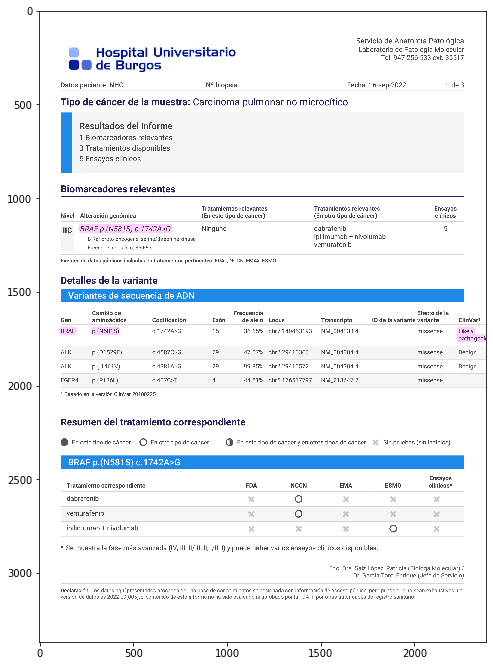

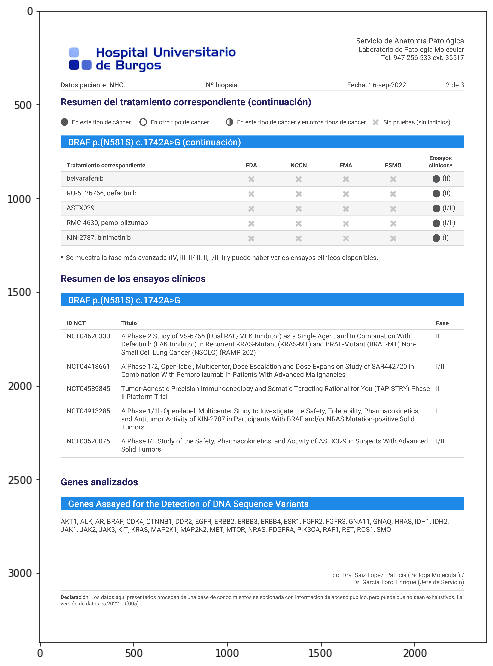

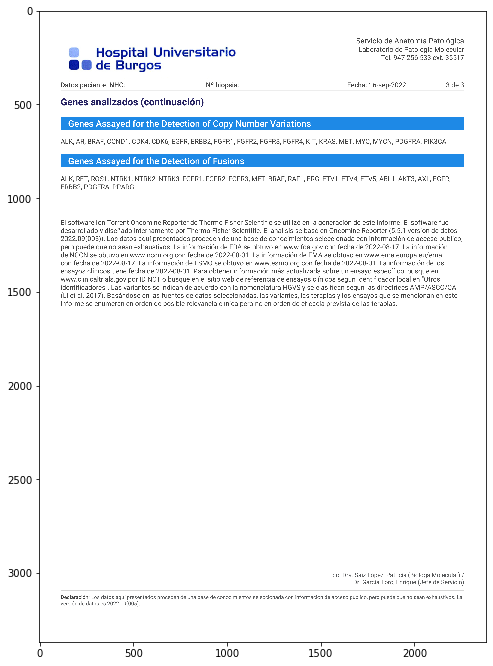

In [21]:
import imageio as iio

i = 0
zoom = 4
mat = fitz.Matrix(zoom, zoom)
with fitz.open("Sample_3_v88.pdf") as doc:
    text = ""
    for page in doc:
        i+=1
        val = f"image_{i+1}.png"
        pix = page.get_pixmap(matrix=mat)
        pix.save(val)
        plt.figure(figsize=(8,15))
        img = iio.imread(val)
        plt.imshow(img, cmap='gray')
        plt.show()

In [ ]:
# Ejecutamos comando %time para determinar el tiempo que tarda la función en ejecutarse. 
%time nombre_funcion_def()

In [4]:
import tabula as read_pdf
from tabulate import tabulate
import tabula
tabula.read_pdf
 
#reads table from pdf file
df = read_pdf('C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados/Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All') #address of pdf file
print(tabulate(df))

TypeError: 'module' object is not callable

PRUEBA CREACION DE BASES DE DATOS.

In [ ]:
#import sqlite3

# Crear una conexión a la base de datos (si no existe, se crea una nueva)
#datos = sqlite3.connect('basededatosHUBU.db')

# Crear una tabla
#datos.execute('''CREATE TABLE usuarios
                #(id INTEGER PRIMARY KEY,
                #nombre TEXT NOT NULL,
                #email TEXT NOT NULL);''')
# Cerrar la conexión
#datos.close()

Como Python no es un sistema de gestión de bases de datos, es necesario el uso de diferentes sistemas de gestión de datos como PostgreSQL para la creación de bases de datos. 
Para la creación es necesario elegir un sistema de gestión de bases de datos y luego usar la biblioteca de Python específica para interactuar. 


DETERMINAMOS TODAS LAS VARIABLES QUE VAMOS A USAR

Número de chip = chip_Data X
Número de paciente = paciente_Data X
NHC = NHC_Data X
Número de biopsia = Nbiopsia_Data X
Biopsia sólida = biopsia_Data X
Fecha de informe = fecha_Data X
Diagnostico = texto_Data X
Total del número de mutaciones = mutacionesTotales_Data X

-----------------------------------------------------
Diagnóstico = texto_Data X
Número de diagnóstico = Ndiagnostico_Data X

-----------------------------------------------------
#Cada mutacion independiente tiene una frecuencia alélica distinta del resto
Mutaciones detectadas en el ADN = mutacionesADN_Data 
Cambio de aminoácido = cambioaa_Data
% de frecuencia alélica = frecuencia_Data
Mutaciones detectadas en el ARN =  mutacionesARN_Data 
Número de lecturas (% de frecuencia alélica en ARN) = lecturasARN_Data
Variaciones del número de lecturas = variaciones_Data 
Número de copias (% de frecuencia alélica en copias) = copias_Data
Total del número de mutaciones = mutacionesTotales_Data X

-------------------------------------------------------
#Nos interesa saber el número de mutaciones que hay tanto en ADN, como en ARN y variaciones, así como el total de las mutaciones del paciente (por eso realizamos la suma).
Número de mutaciones en el ADN = NmutacionesADN_Data
Número de mutaciones en el ARN = NmutacionesARN_Data
Número de mutaciones en las copias = Nvariaciones_Data
Total del número de mutaciones = mutacionesTotales_Data X

------------------------------------------------------
#Cada una de las mutaciones tiene un número que la identifica.
Mutaciones detectadas en el ADN = mutacionesADN_Data 
Mutaciones detectadas en el ARN = mutacionesARN_Data 
Variaciones del número de lecturas = variaciones_Data 
Nº de la mutación específica detectada = NmutacionEspecifica_Data

--------------------------------------------------------
Diagnóstico = texto_Data X
Ensayos clínicos = ensayo_Data X
Fármaco aprobado = farmaco_Data X


#Variables creadas anteriormente que ya no nos interesan.
mutaciones_Data = [] #Ponemos todas las mutaciones, tanto variaciones como número de copias. interesan patogénicas, vacias y todas aquellas que no sean benignas!!!
frecuencia_Data = [] #Ponemos las frecuencais correspondientes a todas las mutaciones detectadas arriba, en el caso del numero de copias ponemos las que hay porque no hay %
NM_Data = [] 
espe_Data = []

# CÓDIGO DEFINITIVO PRUEBA PDF INVENTADOS

In [1]:
import imageio as iio
import fitz  # Esta es la librería pymupdf que habéis instalado
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from tabulate import tabulate
import tabula

In [2]:
import tabula 
import pandas as pd
from tabulate import tabulate


df = tabula.read_pdf("Sample_3_v88.pdf", pages="all", multiple_tables=True)
#df = tabula.read_pdf_with_template("Sample_1.pdf", "Sample1.json")

sample = df[0]

columns = list(sample.columns.values)

print("Columns: " + str(len(columns)))

for a in columns:
    print(a)

print(sample)

print("1 - ********************")

sample = sample.iloc[[0,1]]

print(sample)

print("Size: " + str(sample.size))
print("Shape: " + str(sample.shape[0]))
print("Shape: " + str(sample.shape[1]))

print("1 - ********************")

print(df[0])


print("2 - ********************")

print(df[1])

Columns: 6
Unnamed: 0
Unnamed: 1
Tratamientos relevantes
Tratamientos relevantes Ensayos
Unnamed: 2
Unnamed: 3
                                           Unnamed: 0  \
0                                               Nivel   
1                                                 IIC   
2                                                 NaN   
3                                                 NaN   
4   Fuentes de datos públicos incluidas en tratami...   
5                             Detalles de la variante   
6                       Variantes de secuencia de ADN   
7                                                 NaN   
8                                                 Gen   
9                                                BRAF   
10                                                NaN   
11                                                ALK   
12                                                ALK   
13                                              FGFR4   

                                 

In [3]:
for a in range(len(df)):
    tab = df[a]

    print("Tamaño: " + str(tab.size))

    tab2 = pd.DataFrame(tab)
    print(tab2)

    if (len(tab) >= 0):
        
        variantes = False
        posicion_genes = -1

        for b in tab.values:
            if "Variantes de secuencia de ADN" in b:
                variantes = True

        if variantes == True:
            print("miramos")
            for c in tab:
                print(c.columns)


Tamaño: 84
                                           Unnamed: 0  \
0                                               Nivel   
1                                                 IIC   
2                                                 NaN   
3                                                 NaN   
4   Fuentes de datos públicos incluidas en tratami...   
5                             Detalles de la variante   
6                       Variantes de secuencia de ADN   
7                                                 NaN   
8                                                 Gen   
9                                                BRAF   
10                                                NaN   
11                                                ALK   
12                                                ALK   
13                                              FGFR4   

                                       Unnamed: 1   Tratamientos relevantes  \
0                             Alteración genómica  (En

AttributeError: 'str' object has no attribute 'columns'

In [2]:
def LeerFicherosPDF(ruta):
    ficheros = []
    contenido = os.listdir(ruta)
    for fichero in contenido:
        if os.path.isfile(os.path.join(ruta, fichero)) and fichero.endswith('.pdf'):
            ficheros.append(fichero)
    return ficheros

In [3]:
def LeerDocumento(nombreFichero):
    with fitz.open(nombreFichero) as doc:
        text=""
        for page in doc:
            text = text + page.get_text()
    return text.split('\n')


In [4]:
def BuscarValor(textoBuscar, lines):
    Encontrados = []

    valores = [1 if re.search(textoBuscar, line) else 0 for line in lines]
    valores = [i for i, s in enumerate(valores) if s==1 in valores]

    posiciones = len(textoBuscar)
    
    for i in valores:
        Encontrados.append(lines[i][lines[i].rfind(textoBuscar)+posiciones:].strip())

    return Encontrados

In [5]:
def GenerarImagen(ruta, fichero):
    i = 0   
    zoom = 4
    mat = fitz.Matrix(zoom, zoom)
    with fitz.open(os.path.join(ruta,fichero)) as doc:
        for page in doc:
            i+=1
            val = f"image_{i+1}.png"
            pix = page.get_pixmap(matrix=mat)
            pix.save(os.path.join(ruta,fichero + "_" + val))
            #plt.figure(figsize=(8,15))
            #img = iio.imread(val)
            #plt.imshow(img, cmap='gray')
            #plt.show()

In [6]:
diagnostico = pd.read_excel("C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/Diagnostico.xlsx")
print(diagnostico)

                                          DIAGNÓSTICO  NÚMERO DIAGNÓSTICO
0                         Carcinoma del tracto biliar                 1.0
1                                   Colangiocarcinoma                 1.1
2                     Carcinoma de la vesícula biliar                 1.2
3                                    Cáncer de vejiga                 2.0
4                       Carcinoma vesicular uroterial                 2.1
5                                      Cáncer de mama                 3.0
6                             Triple negativo de mama                 3.1
7              Neoplasia del sistema nervioso central                 4.0
8                                              Glioma                 4.1
9                                     Cáncer cervical                 5.0
10                                      Condrosarcoma                 6.0
11                                 Cáncer colorrectal                 7.0
12            Carcinoma de células esc

In [7]:
genes = pd.read_excel("C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/Genes.xlsx")
print(genes)

mutaciones = genes["GEN"].unique()
#print(mutaciones)
#type(mutacion)

         GEN  Número gen
0       ABL1           1
1       AKT1           2
2       AKT3           3
3        ALK           4
4         AR           5
5        AXL           6
6       BRAF           7
7      CCND1           8
8       CDK4           9
9       CDK6          10
10    CTNNB1          11
11      DDR2          12
12      EGFR          13
13     ERBB2          14
14     ERBB3          15
15     ERBB4          16
16       ERG          17
17      ESR1          18
18      ETV1          19
19      ETV4          20
20      ETV5          21
21     FGFR1          22
22     FGFR2          23
23     FGFR3          24
24     FGFR4          25
25     GNA11          26
26      GNAQ          27
27      HRAS          28
28      IDH1          29
29      IDH2          30
30      JAK1          31
31      JAK2          32
32      JAK3          33
33       KIT          34
34      KRAS          35
35    MAP2K1          36
36    MAP2K2          37
37       MET          38
38      MTOR          39


In [8]:
genes = pd.read_excel("C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/Genes.xlsx")
#print(genes)

mutacion = genes["GEN"].unique()
a = list(mutacion)
print(mutacion)
type(mutacion)
print(a)
type(a)


['ABL1' 'AKT1' 'AKT3' 'ALK' 'AR' 'AXL' 'BRAF' 'CCND1' 'CDK4' 'CDK6'
 'CTNNB1' 'DDR2' 'EGFR' 'ERBB2' 'ERBB3' 'ERBB4' 'ERG' 'ESR1' 'ETV1' 'ETV4'
 'ETV5' 'FGFR1' 'FGFR2' 'FGFR3' 'FGFR4' 'GNA11' 'GNAQ' 'HRAS' 'IDH1'
 'IDH2' 'JAK1' 'JAK2' 'JAK3' 'KIT' 'KRAS' 'MAP2K1' 'MAP2K2' 'MET' 'MTOR'
 'MYC' 'MYCN' 'NRAS' 'NTRK1' 'NTRK2' 'NTRK3' 'PDGFRA' 'PIK3CA' 'PPARG'
 'RAF1' 'RET' 'ROS1' 'SMO' 'EML4-ALK']
['ABL1', 'AKT1', 'AKT3', 'ALK', 'AR', 'AXL', 'BRAF', 'CCND1', 'CDK4', 'CDK6', 'CTNNB1', 'DDR2', 'EGFR', 'ERBB2', 'ERBB3', 'ERBB4', 'ERG', 'ESR1', 'ETV1', 'ETV4', 'ETV5', 'FGFR1', 'FGFR2', 'FGFR3', 'FGFR4', 'GNA11', 'GNAQ', 'HRAS', 'IDH1', 'IDH2', 'JAK1', 'JAK2', 'JAK3', 'KIT', 'KRAS', 'MAP2K1', 'MAP2K2', 'MET', 'MTOR', 'MYC', 'MYCN', 'NRAS', 'NTRK1', 'NTRK2', 'NTRK3', 'PDGFRA', 'PIK3CA', 'PPARG', 'RAF1', 'RET', 'ROS1', 'SMO', 'EML4-ALK']


list

## ENSAYOS CLÍNICOS Y TRATAMIENTOS DISPONIBLES. 

In [9]:
#texto = "Se están llevando a cabo 5 ensayos clínicos en este momento."

#patron = r"(\d+)\s*ensayos clínicos"

#resultado = re.search(patron, texto)

#if resultado:
    #valor = int(resultado.group(1))
    #print("El valor de ensayos clínicos es:", valor)
#else:
    #print("No se encontró información de ensayos clínicos.")

In [9]:
patron = r"(\d+)\s* Ensayos clínicos"
Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'
ficheros = LeerFicherosPDF(Ruta)
#resultado = re.search(patron, lines)
#lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))

lista_ensayos = []

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    
    ensayos = 0
    for line in lines:
        resultado = re.search(patron, line)
        if resultado:
            ensayos = int(resultado.group(1))
            
    lista_ensayos.append(ensayos)   
    
    print(ficheroPDF + " -> Ensayos: " + str(ensayos))
print(lista_ensayos)
#Me devuelve los resultados de Sample_3_v88 Y YO ESE NO LE USO!
#Quiero trabajar con los ficheros de la carpeta RE_PDF_inventados

Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf -> Ensayos: 6
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf -> Ensayos: 5
Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf -> Ensayos: 0
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf -> Ensayos: 0
Sample_5_v100_da86c58e-d529-400b-8812-506948d0c3ed_2023-03-02_11-53-07-777_All.pdf -> Ensayos: 3
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf -> Ensayos: 5
Sample_7_v100_869cc724-f5f4-4d61-a708-c818a6c062ef_2023-03-02_11-50-41-677_All.pdf -> Ensayos: 1
Sample_8_v100_14451fbc-44ce-480e-9107-c6ab537a1fda_2023-03-02_11-49-41-641_All.pdf -> Ensayos: 0
[6, 5, 0, 0, 3, 5, 1, 0]


In [10]:
lista_ensayos

[6, 5, 0, 0, 3, 5, 1, 0]

In [11]:
ensayos_finales = []
for i in lista_ensayos:
    if i == 0:
        ensayos_finales.append(0)
    else:
        ensayos_finales.append(1)
print(ensayos_finales)

[1, 1, 0, 0, 1, 1, 1, 0]


In [12]:
patron2 = r"(\d+)\s* Tratamientos disponibles"
Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'
ficheros = LeerFicherosPDF(Ruta)

lista_tratamientos = []

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta, ficheroPDF))
    tratamientos = 0
    
    for line in lines:
        resultado = re.search(patron2, line)
        if resultado:
            tratamientos = int(resultado.group(1))
    
    lista_tratamientos.append(tratamientos)
    print(ficheroPDF + " -> Tratamientos: " + str(tratamientos))
    
print(lista_tratamientos)
#Me devuelve los resultados de Sample_3_v88 Y YO ESE NO LE USO!
#Quiero trabajar con los ficheros de la carpeta RE_PDF_inventados

Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf -> Tratamientos: 6
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf -> Tratamientos: 1
Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf -> Tratamientos: 0
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf -> Tratamientos: 0
Sample_5_v100_da86c58e-d529-400b-8812-506948d0c3ed_2023-03-02_11-53-07-777_All.pdf -> Tratamientos: 3
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf -> Tratamientos: 0
Sample_7_v100_869cc724-f5f4-4d61-a708-c818a6c062ef_2023-03-02_11-50-41-677_All.pdf -> Tratamientos: 0
Sample_8_v100_14451fbc-44ce-480e-9107-c6ab537a1fda_2023-03-02_11-49-41-641_All.pdf -> Tratamientos: 1
[6, 1, 0, 0, 3, 0, 0, 1]


In [13]:
lista_tratamientos

[6, 1, 0, 0, 3, 0, 0, 1]

In [14]:
tratamientos_finales = []
for i in lista_tratamientos:
    if i == 0:
        tratamientos_finales.append(0)
    else:
        tratamientos_finales.append(1)
print(tratamientos_finales)

[1, 1, 0, 0, 1, 0, 0, 1]


## MUTACIONES Y DERIVADOS

In [15]:
#Todos los genes mutados que hay en cada ficherO (ESTO NO ME INTERSA!)
Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'

ficheros = LeerFicherosPDF(Ruta)

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    
    for mutacion in mutaciones:
        if mutacion in lines:
            print(ficheroPDF + " - Existe: " + mutacion)
            

Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: ALK
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: FGFR4
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: MYC
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: EML4-ALK
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: ALK
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: FGFR4
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: KRAS
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: MET
Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf - Existe: ALK
Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf - Existe: FGFR4
Sample_4_v100_03eb

In [16]:
#Genes mutados de interés (PATOGENICOS / VACIOS ) BIEN!!!
Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'

ficheros = LeerFicherosPDF(Ruta)

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
                
    for mutacion in mutaciones:
        if mutacion in lines:
            posicion = lines.index(mutacion)
            
            #print(ficheroPDF + " - Existe: " + mutacion)
            #print(posiciones)
            if mutacion == "FGFR4": #solo el tipo p.(P136L)
                #posicion = lines.index("FGFR4")
                #print(posicion)
                #print(posicion + 1)
                if (posicion < len(lines)-1 and lines[posicion + 1] == "p.(P136L)"):
                    pass
                else:
                    print(ficheroPDF + " - Existe: " + mutacion)
            else:
                benigno = False
                #print(mutacion)
                for a in range(posicion+1, posicion+10):
                    #print(str(a) + " > " + lines[a])
                    if "Benign" in lines[a]:
                        #print(lines[a])
                        benigno = True
                if benigno == False:
                    print(ficheroPDF + " - Existe: " + mutacion)

                    
#            elif (posiciones<len(lines) - 9 and lines[posiciones + 9] == "Benign"):
 #               pass
  #          elif (posiciones<len(lines) - 9 and lines[posiciones + 9] == "Benign/Likelybenign"):
   #             pass
    #        else: 
     #           print(ficheroPDF + " - Existe: " + mutacion)
      #          #print(posiciones)
                
#FALLOS.
# NO APARECEN LOS REPETIDOS DOS VECES, SOLO APARECEN UNA


Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: MYC
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: EML4-ALK
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: KRAS
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: FGFR1
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: PIK3CA
Sample_5_v100_da86c58e-d529-400b-8812-506948d0c3ed_2023-03-02_11-53-07-777_All.pdf - Existe: CDK6
Sample_5_v100_da86c58e-d529-400b-8812-506948d0c3ed_2023-03-02_11-53-07-777_All.pdf - Existe: MET
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf - Existe: CTNNB1
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf - Existe: EGFR
Sample_7_v100_869cc724-f5f4-4d61-a708-c818a6c062ef_2023-03-02_11-50-41-677_All.pdf - Existe: HRAS
Sample_8_v100

In [17]:
#Solo genes patogénicos BIEN!!!
for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta, ficheroPDF))
    
    for mutacion in mutaciones:
        if mutacion in lines:
            posicion = lines.index(mutacion)

            for a in range(posicion+1, min(posicion+10, len(lines))):
                if "Pathogeni" in lines[a]:
                    print(ficheroPDF + " - Existe: " + mutacion + " - Pathogenic")
                

Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: KRAS - Pathogenic
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf - Existe: CTNNB1 - Pathogenic


In [18]:
patogen = {}

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    genpato2 = []
    
    for mutacion in mutaciones:
        if mutacion in lines:
            posicion = lines.index(mutacion)
            
            for a in range(posicion+1, min(posicion+10, len(lines))):
                if "Pathogeni" in lines[a]:
                    genpato2.append(mutacion)
                    print(ficheroPDF + " - Existe: " + mutacion + " - Pathogenic")
            
                    
    
    patogen[ficheroPDF] = genpato2
    
print(patogen)

Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: KRAS - Pathogenic
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf - Existe: CTNNB1 - Pathogenic
{'Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf': [], 'Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf': ['KRAS'], 'Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf': [], 'Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf': [], 'Sample_5_v100_da86c58e-d529-400b-8812-506948d0c3ed_2023-03-02_11-53-07-777_All.pdf': [], 'Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf': ['CTNNB1'], 'Sample_7_v100_869cc724-f5f4-4d61-a708-c818a6c062ef_2023-03-02_11-50-41-677_All.pdf': [], 'Sample_8_v100_14451fbc-44ce-480e-9107-c6ab537a1fda_2023-03-02_11-49-41-641_All.pdf': []}


In [19]:
patologicos = list(patogen.values())
patologicos

[[], ['KRAS'], [], [], [], ['CTNNB1'], [], []]

In [90]:
numero_iden_pato = []
for i in patologicos:
    valores = [mutaciones_dic.get(gen, 0) for gen in i]
    numero_iden_pato.append(valores)

print(numero_iden_pato)

[[], [35], [], [], [], [11], [], []]


In [93]:
#MEZCLA DE AMBOS
for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
                
    for mutacion in mutaciones:
        if mutacion in lines:
            posicion = lines.index(mutacion)
            
            #print(ficheroPDF + " - Existe: " + mutacion)
            #print(posiciones)
            if mutacion == "FGFR4": #solo el tipo p.(P136L)
                #posicion = lines.index("FGFR4")
                #print(posicion)
                #print(posicion + 1)
                if (posicion < len(lines)-1 and lines[posicion + 1] == "p.(P136L)"):
                    pass
                else:
                    print(ficheroPDF + " - Existe: " + mutacion)
            else:
                benigno = False
                #print(mutacion)
                for a in range(posicion+1, posicion+10):
                    #print(str(a) + " > " + lines[a])
                    if "Benign" in lines[a]:
                        #print(lines[a])
                        benigno = True
                if benigno == False:
                    print(ficheroPDF + " - Existe: " + mutacion)
                    
            for a in range(posicion+1, posicion+10):
                if "Pathogeni" in lines[a]:
                    print(ficheroPDF + " - Existe: " + mutacion + " - Pathogenic")
                    
patogen = {}

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    genpato2 = []
    
    for mutacion in mutaciones:
        if mutacion in lines:
            posicion = lines.index(mutacion)
            
            for a in range(posicion+1, min(posicion+10, len(lines))):
                if "Pathogeni" in lines[a]:
                    genpato2.append(mutacion)
                    print(ficheroPDF + " - Existe: " + mutacion + " - Pathogenic")
            
                    
    
    patogen[ficheroPDF] = genpato2
    
print(patogen)

Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: MYC
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: EML4-ALK
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: KRAS
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: KRAS - Pathogenic
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: FGFR1
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: PIK3CA
Sample_5_v100_da86c58e-d529-400b-8812-506948d0c3ed_2023-03-02_11-53-07-777_All.pdf - Existe: CDK6
Sample_5_v100_da86c58e-d529-400b-8812-506948d0c3ed_2023-03-02_11-53-07-777_All.pdf - Existe: MET
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf - Existe: CTNNB1
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf - Existe: CTNNB

In [21]:
#TOTAL DEL NÚMERO DE MUTACIONES BIEN!!
ficheros = LeerFicherosPDF(Ruta)
max_mut = 0

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    total_mut = 0
    
    for mutacion in mutaciones:
        if mutacion in lines:
            posicion = lines.index(mutacion)
            
            #print(ficheroPDF + " - Existe: " + mutacion)
            #print(posiciones)
            if mutacion == "FGFR4": #solo el tipo p.(P136L)
                #posicion = lines.index("FGFR4")
                #print(posicion)
                #print(posicion + 1)
                if (posicion < len(lines)-1 and lines[posicion + 1] == "p.(P136L)"):
                    pass
                else:
                    total_mut += 1
                    print(ficheroPDF + " - Existe: " + mutacion)
            else:
                benigno = False
                #print(mutacion)
                for a in range(posicion+1, posicion+10):
                    #print(str(a) + " > " + lines[a])
                    if "Benign" in lines[a]:
                        #print(lines[a])
                        benigno = True
                if benigno == False:
                    total_mut += 1
                    print(ficheroPDF + " - Existe: " + mutacion)
                    
                    
    if total_mut > max_mut:
        max_mut = total_mut
    print(f"{ficheroPDF} - Número total de mutaciones : {total_mut}")


Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: MYC
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: EML4-ALK
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Número total de mutaciones : 2
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: KRAS
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Número total de mutaciones : 1
Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf - Número total de mutaciones : 0
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: FGFR1
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: PIK3CA
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Número total de mutaciones : 2
Sample_5_v100_da86c58e-d529-400b-8812-50

In [22]:
#¿ES MEJOR ESTE CÓDIGO O EL ANTERIOR?
ficheros = LeerFicherosPDF(Ruta)
max_mut = 0
todas_mutaciones = []

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    mutaciones_archivo = []
    total_mut = 0
    
    for mutacion in mutaciones:
        if mutacion in lines:
            posicion = lines.index(mutacion)
            
            #print(ficheroPDF + " - Existe: " + mutacion)
            #print(posiciones)
            if mutacion == "FGFR4": #solo el tipo p.(P136L)
                #posicion = lines.index("FGFR4")
                #print(posicion)
                #print(posicion + 1)
                if (posicion < len(lines)-1 and lines[posicion + 1] == "p.(P136L)"):
                    pass
                else:
                    total_mut += 1
                    mutaciones_archivo.append(mutacion)
                    print(ficheroPDF + " - Existe: " + mutacion)
            else:
                benigno = False
                #print(mutacion)
                for a in range(posicion+1, posicion+10):
                    #print(str(a) + " > " + lines[a])
                    if "Benign" in lines[a]:
                        #print(lines[a])
                        benigno = True
                if benigno == False:
                    total_mut += 1
                    mutaciones_archivo.append(mutacion)
                    print(ficheroPDF + " - Existe: " + mutacion)
                    
    todas_mutaciones.extend(mutaciones_archivo)
    if total_mut > max_mut:
        max_mut = total_mut
    print(f"{ficheroPDF} - Número total de mutaciones : {total_mut}")
    
print(f"Todas las mutaciones encontradas: {todas_mutaciones}")


Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: MYC
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: EML4-ALK
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Número total de mutaciones : 2
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: KRAS
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Número total de mutaciones : 1
Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf - Número total de mutaciones : 0
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: FGFR1
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: PIK3CA
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Número total de mutaciones : 2
Sample_5_v100_da86c58e-d529-400b-8812-50

In [23]:
todas_mutaciones
#No sirve para hacer la tabla final!

['MYC',
 'EML4-ALK',
 'KRAS',
 'FGFR1',
 'PIK3CA',
 'CDK6',
 'MET',
 'CTNNB1',
 'EGFR',
 'HRAS',
 'KIT',
 'MYC']

In [24]:
Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'
ficheros = LeerFicherosPDF(Ruta)
max_mutaciones = 0
cambioAA = []

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    total_mutaciones = 0
    
    for mutacion in mutaciones:
        if mutacion in lines:
            posiciones = lines.index(mutacion)
            #print(ficheroPDF + " - Existe: " + mutacion)
            #print(posiciones)
            if mutacion == "FGFR4": #solo el tipo p.(P136L)
                #posicion = lines.index("FGFR4")
                #print(posicion)
                #print(posicion + 1)
                if (posiciones < len(lines)-1 and lines[posiciones + 1] == "p.(P136L)"):
                    pass
                else:
                    total_mutaciones += 1
                    print(ficheroPDF + " - Existe: " + mutacion)
            elif (posiciones<len(lines) - 9 and lines[posiciones + 9] == "Benign"):
                pass
            elif (posiciones<len(lines) - 9 and lines[posiciones + 9] == "Benign/Likelybenign"):
                pass
            else: 
                total_mutaciones += 1
                #print(ficheroPDF + " - Existe: " + mutacion)
                #print(posiciones)
                #print(f"{ficheroPDF} - Número total de mutaciones : {total_mutaciones}")
                
                if (posiciones < len(lines)-1 and lines[posiciones + 1].startswith("p.(")):
                    cambioAA.append([mutacion, lines[posiciones + 1]])

                
    if total_mutaciones > max_mutaciones:
        max_mutaciones = total_mutaciones
    #print(f"{ficheroPDF} - Número total de mutaciones : {total_mutaciones}")
print(cambioAA) 
#DEL TOTAL DE MUTACIONES SOLO QUIERO SABER EL VALOR MÁXIMO

[['MYC', 'p.(N26S)'], ['KRAS', 'p.(G12V)'], ['MET', 'p.(N375S)'], ['KIT', 'p.(M541L)'], ['CTNNB1', 'p.(S37C)'], ['EGFR', 'p.(G779F)'], ['HRAS', 'p.(Q61R)'], ['KIT', 'p.(W557_K558del)'], ['MYC', 'p.(N26S)']]


In [25]:
ficheros = LeerFicherosPDF(Ruta)
max_mut = 0
aa = []

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    total_mut = 0
    
    for mutacion in mutaciones:
        if mutacion in lines:
            posicion = lines.index(mutacion)
            
            #print(ficheroPDF + " - Existe: " + mutacion)
            #print(posiciones)
            if mutacion == "FGFR4": #solo el tipo p.(P136L)
                #posicion = lines.index("FGFR4")
                #print(posicion)
                #print(posicion + 1)
                if (posicion < len(lines)-1 and lines[posicion + 1] == "p.(P136L)"):
                    pass
                else:
                    total_mut += 1
                    print(ficheroPDF + " - Existe: " + mutacion)
            else:
                benigno = False
                #print(mutacion)
                for a in range(posicion+1, posicion+10):
                    #print(str(a) + " > " + lines[a])
                    if "Benign" in lines[a]:
                        #print(lines[a])
                        benigno = True
                if benigno == False:
                    total_mut += 1
                    #print(ficheroPDF + " - Existe: " + mutacion)
                    
                    if (posiciones < len(lines)-1 and lines[posiciones + 1].startswith("p.(")):
                        aa.append([mutacion, lines[posiciones + 1]])
                    
                    
    if total_mutaciones > max_mutaciones:
        max_mutaciones = total_mutaciones
    print(f"{ficheroPDF} - Número total de mutaciones : {total_mut}")

print(aa) 

Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Número total de mutaciones : 2
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Número total de mutaciones : 1
Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf - Número total de mutaciones : 0
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Número total de mutaciones : 2
Sample_5_v100_da86c58e-d529-400b-8812-506948d0c3ed_2023-03-02_11-53-07-777_All.pdf - Número total de mutaciones : 2
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf - Número total de mutaciones : 2
Sample_7_v100_869cc724-f5f4-4d61-a708-c818a6c062ef_2023-03-02_11-50-41-677_All.pdf - Número total de mutaciones : 1
Sample_8_v100_14451fbc-44ce-480e-9107-c6ab537a1fda_2023-03-02_11-49-41-641_All.pdf - Número total de mutaciones : 2
[['KIT', 'p.(N26S)'], ['MYC', 'p.(N26S)']]


In [26]:
aminoacidosMutados = []

for item in cambioAA:
    if item[1].startswith("p.("):
        aminoacidosMutados.append(item[1][:])

print(aminoacidosMutados)

['p.(N26S)', 'p.(G12V)', 'p.(N375S)', 'p.(M541L)', 'p.(S37C)', 'p.(G779F)', 'p.(Q61R)', 'p.(W557_K558del)', 'p.(N26S)']


In [28]:
aminoacidosMutados

['p.(N26S)',
 'p.(G12V)',
 'p.(N375S)',
 'p.(M541L)',
 'p.(S37C)',
 'p.(G779F)',
 'p.(Q61R)',
 'p.(W557_K558del)',
 'p.(N26S)']

## MUTACIONES 

In [30]:
#OBTENCIÓN GENES, NÚMERO Y VALORES BIEN!!
ficheros = LeerFicherosPDF(Ruta)
max_mut = 0
genes_mut2 = {}

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    total_mut = 0
    encontrados2 = []
    
    for mutacion in mutaciones:
        if mutacion in lines:
            posicion = lines.index(mutacion)
            
            #print(ficheroPDF + " - Existe: " + mutacion)
            #print(posiciones)
            if mutacion == "FGFR4": #solo el tipo p.(P136L)
                #posicion = lines.index("FGFR4")
                #print(posicion)
                #print(posicion + 1)
                if (posicion < len(lines)-1 and lines[posicion + 1] == "p.(P136L)"):
                    pass
                else:
                    total_mut += 1
                    encontrados2.append(mutacion)
                    print(ficheroPDF + " - Existe: " + mutacion)
            else:
                benigno = False
                #print(mutacion)
                for a in range(posicion+1, posicion+10):
                    #print(str(a) + " > " + lines[a])
                    if "Benign" in lines[a]:
                        #print(lines[a])
                        benigno = True
                if benigno == False:
                    total_mut += 1
                    encontrados2.append(mutacion)
                    print(ficheroPDF + " - Existe: " + mutacion)
                    
    
    genes_mut2[ficheroPDF] = encontrados2
    if total_mut > max_mut:
        max_mut = total_mut
    print(f"{ficheroPDF} - Número total de mutaciones : {total_mut}")
print(genes_mut2)

Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: MYC
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Existe: EML4-ALK
Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf - Número total de mutaciones : 2
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Existe: KRAS
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf - Número total de mutaciones : 1
Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf - Número total de mutaciones : 0
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: FGFR1
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Existe: PIK3CA
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf - Número total de mutaciones : 2
Sample_5_v100_da86c58e-d529-400b-8812-50

In [31]:
mut = list(genes_mut2.values())
mut

[['MYC', 'EML4-ALK'],
 ['KRAS'],
 [],
 ['FGFR1', 'PIK3CA'],
 ['CDK6', 'MET'],
 ['CTNNB1', 'EGFR'],
 ['HRAS'],
 ['KIT', 'MYC']]

In [32]:
num_mutaciones = [len(i) for i in mut]
print(num_mutaciones)

[2, 1, 0, 2, 2, 2, 1, 2]


In [34]:
#Creo un diccionario con los valores del 
mutaciones_dic = dict(zip(genes["GEN"], genes["Número gen"]))
mutaciones_dic

for gen, valor in mutaciones_dic.items():
    print(gen, valor)

ABL1 1
AKT1 2
AKT3 3
ALK 4
AR 5
AXL 6
BRAF 7
CCND1 8
CDK4 9
CDK6 10
CTNNB1 11
DDR2 12
EGFR 13
ERBB2 14
ERBB3 15
ERBB4 16
ERG 17
ESR1 18
ETV1 19
ETV4 20
ETV5 21
FGFR1 22
FGFR2 23
FGFR3 24
FGFR4 25
GNA11 26
GNAQ 27
HRAS 28
IDH1 29
IDH2 30
JAK1 31
JAK2 32
JAK3 33
KIT 34
KRAS 35
MAP2K1 36
MAP2K2 37
MET 38
MTOR 39
MYC 40
MYCN 41
NRAS 42
NTRK1 43
NTRK2 44
NTRK3 45
PDGFRA 46
PIK3CA 47
PPARG 48
RAF1 49
RET 50
ROS1 51
SMO 52
EML4-ALK 53


In [35]:
numero_iden = []
for i in mut:
    valores = [mutaciones_dic.get(gen, 0) for gen in i]
    numero_iden.append(valores)

print(numero_iden)

[[40, 53], [35], [], [22, 47], [10, 38], [11, 13], [28], [34, 40]]


In [36]:
cambioAA = []

for i in genes_mut2:
    if (posiciones < len(lines)-1 and lines[posiciones + 1].startswith("p.(")):
        cambioAA.append([mutacion, lines[posiciones + 1]])
        
print(cambioAA)

[['EML4-ALK', 'p.(N26S)'], ['EML4-ALK', 'p.(N26S)'], ['EML4-ALK', 'p.(N26S)'], ['EML4-ALK', 'p.(N26S)'], ['EML4-ALK', 'p.(N26S)'], ['EML4-ALK', 'p.(N26S)'], ['EML4-ALK', 'p.(N26S)'], ['EML4-ALK', 'p.(N26S)']]


## NÚMERO DE CHIP Y PACIENTE

In [37]:
#Leemos todos los nombres de los archivos PDF

Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'
archivos = os.listdir(Ruta)

for archivo in archivos:
    if os.path.isfile(os.path.join(Ruta, archivo)) and archivo.endswith(".pdf"):
        print(archivo)

Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf
Sample_2_v100_dc008f2f-9bc7-4ac2-89d2-7f3ba6fdb04d_2023-03-02_11-56-10-540_All.pdf
Sample_3_v100_50c27cd1-3ee7-490c-8ec6-30091039bb9c_2023-03-02_11-55-40-900_All.pdf
Sample_4_v100_03eb528b-ded2-4db9-81fe-e1553385db88_2023-03-02_11-54-08-761_All.pdf
Sample_5_v100_da86c58e-d529-400b-8812-506948d0c3ed_2023-03-02_11-53-07-777_All.pdf
Sample_6_v100_52c1af10-c6e1-4f44-85d8-bfa7260fb9ff_2023-03-02_11-52-19-927_All.pdf
Sample_7_v100_869cc724-f5f4-4d61-a708-c818a6c062ef_2023-03-02_11-50-41-677_All.pdf
Sample_8_v100_14451fbc-44ce-480e-9107-c6ab537a1fda_2023-03-02_11-49-41-641_All.pdf


In [38]:
#Número de paciente de cada uno de los ficheros

#Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'
#archivos = os.listdir(Ruta)

#for archivo in archivos:
    #if os.path.isfile(os.path.join(Ruta, archivo)) and archivo.endswith(".pdf"):
        #paciente = os.path.splitext(archivo)[0]
        #numero_paciente = paciente[7]
        #print(numero_paciente)

In [39]:
#Sacamos el tercer valor de cada nombre, que es el que indica el número del paciente
Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'
archivos = os.listdir(Ruta)
numero_paciente = []

for archivo in archivos:
    if os.path.isfile(os.path.join(Ruta, archivo)) and archivo.endswith(".pdf"):
        paciente = os.path.splitext(archivo)[0]
        pacientes = paciente[7]
        numero_paciente.append(pacientes)
        print(numero_paciente)

['1']
['1', '2']
['1', '2', '3']
['1', '2', '3', '4']
['1', '2', '3', '4', '5']
['1', '2', '3', '4', '5', '6']
['1', '2', '3', '4', '5', '6', '7']
['1', '2', '3', '4', '5', '6', '7', '8']


In [40]:
numero_paciente

['1', '2', '3', '4', '5', '6', '7', '8']

In [41]:
#Número de chip de cada uno de los ficheros
Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'
archivos = os.listdir(Ruta)
chip = []

for archivo in archivos:
    if os.path.isfile(os.path.join(Ruta, archivo)) and archivo.endswith(".pdf"):
        paciente = os.path.splitext(archivo)[0]
        pacientes = paciente[10:13]
        chip.append(pacientes)
        print(chip)

['100']
['100', '100']
['100', '100', '100']
['100', '100', '100', '100']
['100', '100', '100', '100', '100']
['100', '100', '100', '100', '100', '100']
['100', '100', '100', '100', '100', '100', '100']
['100', '100', '100', '100', '100', '100', '100', '100']


In [42]:
#Cómo puedo hacerlo sin tener que escoger la posición 10:13??
chip

['100', '100', '100', '100', '100', '100', '100', '100']

In [43]:
#Otra forma usando expresiones regulares para sacar el número de chip
Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'
archivos = os.listdir(Ruta)
chip2 = []

for archivo in archivos:
    if os.path.isfile(os.path.join(Ruta, archivo)) and archivo.endswith(".pdf"):
        patron = r"v(\d+)_"
        resultado = re.search(patron, archivo)
        if resultado:
            numero_chip = resultado.group(1)
            chip2.append(numero_chip)
print(chip2)

['100', '100', '100', '100', '100', '100', '100', '100']


In [45]:
chip

['100', '100', '100', '100', '100', '100', '100', '100']

## OBTENCIÓN DE ALGUNOS RESULTADOS.

In [46]:
#SOLO QUIERO UNA COPIA DE CADA UNO!!!
chip_Data = [] #viene en el nombre del archivo (entre barrabajas)
paciente_Data = [] #viene en el nombre del archivo (detras de v)
fecha_Data = []
NHC_Data = [] #solo quiero una copia
Nbiopsia_Data = [] 
biopsia_Data = [] #Tercer valor empezando por delante del número de biopsia!!! Poner 0 no, 1 si, 2 puncion, 3 citologia
texto_Data = [] #En oncomine reporter viene en ingles!!!!!!
mutaciones_Data = [] #Ponemos todas las mutaciones, tanto variaciones como número de copias. interesan patogénicas, vacias y todas aquellas que no sean benignas!!!
frecuencia_Data = [] #Ponemos las frecuencais correspondientes a todas las mutaciones detectadas arriba, en el caso del numero de copias ponemos las que hay porque no hay %
NM_Data = [] 
espe_Data = []
farmaco_Data = [] #Decir si hay 1 o no 0, no nos intersan los nombres 
ensayo_Data = [] #Decir el número de ensayos, no nos intersan las fases en las que se encuentran.
BM_Data = [] #esta la podemos determinar en mutaciones, asi que no seria necesaria
Ndiagnostico_Data = [] #Tabla de Patri, poner numeros a las distintas mutaciones que hay

Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'
#RutaPatricia = 'C:/Users/71293763l/Documents/PRUEBA_DATOS' carpeta que nos hemos inventado para trabajar cuando se lo pase

ficheros = LeerFicherosPDF(Ruta)

for ficheroPDF in ficheros:
    #print(os.path.join(Ruta,ficheroPDF))
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))

    #print(lines)

    NHC_Data.append(BuscarValor("NHC:", lines))
    Nbiopsia_Data.append(BuscarValor("biopsia:", lines))
    fecha_Data.append(BuscarValor("Fecha:", lines))
    texto_Data.append(BuscarValor("de la muestra:", lines))
    #frecuencia_Data.append(BuscarValor("alelo:", lines))
    #ensayo_Data.append(BuscarValor("fase más avanzada", lines)) #Quiero el número de delante? O la fase?
    #mutaciones_Data.append(BuscarValor("likely", lines)) #Tipo mutación específico EXTRA 
    #NM_Data.append(BuscarValor("likely", lines)) #Creo una tabla para referenciar a cada mutacion por un numero
    #farmaco_Data.append(BuscarValor("relevantes", lines)) #Fármaco aprobado FALTA POR DETERMINAR
    #BM_Data.append(BuscarValor("likely", lines)) #Beligno maligno EXTRA
    #Ndiagnostico_Data.append(BuscarValor("likely", lines)) #FALTA POR DETERMINAR

    GenerarImagen(Ruta,ficheroPDF)

print(NHC_Data)
print(Nbiopsia_Data)
print(fecha_Data)
print(texto_Data)
#print(frecuencia_Data)
#print(ensayo_Data)
#print(mutaciones_Data)
#print(NM_Data)
#print(farmaco_Data)
#print(BM_Data)
#print(Ndiagnostico_Data)


#chip_Data = [] #carpeta
#paciente_Data = [] #carpeta
#biopsia_Data = []
#espe_Data = []


[['00021', '00021', '00021'], ['00022', '00022', '00022'], ['00023', '00023'], ['00024', '00024'], ['00025', '00025', '00025'], ['00026', '00026', '00026'], ['00027', '00027'], ['00028', '00028']]
[['23B00021-A1', '23B00021-A1', '23B00021-A1'], ['22B00022-A2', '22B00022-A2', '22B00022-A2'], ['21B00023-A1', '21B00023-A1'], ['23B00024-A1', '23B00024-A1'], ['23C00025-A1', '23C00025-A1', '23C00025-A1'], ['23P00026', '23P00026', '23P00026'], ['22B00027-C4', '22B00027-C4'], ['23B00028-A2', '23B00028-A2']]
[['24-mar-2023', '24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023']]
[['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar 

In [47]:
print(texto_Data)
m = texto_Data[0][0]
print(m)


[['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Cáncer tiroideo'], ['Cáncer gástrico']]
Carcinoma pulmonar no microcítico


## DIAGNÓSTICO.

In [48]:
diagnostico = pd.read_excel("C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/Diagnostico.xlsx")
#print(diagnostico)

#Creo un diccionario con los valores tanto del diagnóstico como del número correspondiente. 
diagnosticos_dic = dict(zip(diagnostico["DIAGNÓSTICO"], diagnostico["NÚMERO DIAGNÓSTICO"]))

for diagnostico in diagnosticos_dic:
    valor = diagnosticos_dic.get(diagnostico)
    print(diagnostico, valor)


Carcinoma del tracto biliar 1.0
Colangiocarcinoma 1.1
Carcinoma de la vesícula biliar 1.2
Cáncer de vejiga 2.0
Carcinoma vesicular uroterial 2.1
Cáncer de mama 3.0
Triple negativo de mama 3.1
Neoplasia del sistema nervioso central 4.0
Glioma 4.1
Cáncer cervical 5.0
Condrosarcoma 6.0
Cáncer colorrectal 7.0
Carcinoma de células escamosas cutáneas 8.0
Carcinoma endometrial 9.0
 Cáncer esofágico 10.0
Cáncer gástrico 11.0
Tumor del estroma gastrointestinal 11.1
Cáncer de cabeza y cuello 12.0
Cáncer de riñón 13.0
Cáncer de hígado 14.0
Carcinoma hepatocelular 14.1
Cáncer de pulmón/pulmonar 15.0
Carcinoma pulmonar no microcítico 15.1
Carcinoma pulmonar microcítico 15.2
Melanoma 16.0
Carcinoma de células Merkel 17.0
Mesotelioma 18.0
Neoplasia mixto neuroendocrino no- neuroendocrino 19.0
Carcinoma neuroendocrino 20.0
Carcinoma neuroendocrino de células pequeñas 20.1
Tumor neuroendocrino 21.0
Osteosarcoma 22.0
Cáncer de ovario 23.0
Cáncer de páncreas 24.0
Paraganglioma 25.0
Cáncer de próstata 26.

In [49]:
textoDiag = []
for i in texto_Data:
    sinduplicados = list(set(i))
    textoDiag.append([x for x in i if x in sinduplicados][0])

print(textoDiag)

['Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Cáncer tiroideo', 'Cáncer gástrico']


In [50]:
numeroDiag = []
for diagnostico in textoDiag:
    valor = diagnosticos_dic.get(diagnostico)
    numeroDiag.append(valor)
    print(numeroDiag)

[15.1]
[15.1, 15.1]
[15.1, 15.1, 15.1]
[15.1, 15.1, 15.1, 15.1]
[15.1, 15.1, 15.1, 15.1, 15.1]
[15.1, 15.1, 15.1, 15.1, 15.1, 15.1]
[15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 30.0]
[15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 30.0, 11.0]


In [51]:
numeroDiag

[15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 30.0, 11.0]

## NHC

In [52]:
NHC_Data_val = list(set([valor for sublist in NHC_Data for valor in sublist]))
print(NHC_Data_val)
NHC_final = sorted(NHC_Data_val)
print(NHC_final)

['00023', '00024', '00021', '00026', '00025', '00028', '00022', '00027']
['00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028']


## BIOPSIA

In [53]:
Nbiopsia_Data

[['23B00021-A1', '23B00021-A1', '23B00021-A1'],
 ['22B00022-A2', '22B00022-A2', '22B00022-A2'],
 ['21B00023-A1', '21B00023-A1'],
 ['23B00024-A1', '23B00024-A1'],
 ['23C00025-A1', '23C00025-A1', '23C00025-A1'],
 ['23P00026', '23P00026', '23P00026'],
 ['22B00027-C4', '22B00027-C4'],
 ['23B00028-A2', '23B00028-A2']]

In [54]:
lista_resultante =  []
elementos_vistos = set()

for sublist in Nbiopsia_Data:
    sublist_sin_duplicados = []
    for elemento in sublist:
        if elemento not in elementos_vistos:
            sublist_sin_duplicados.append(elemento)
            elementos_vistos.add(elemento)
    lista_resultante.append(sublist_sin_duplicados)

print(lista_resultante)

NB_values = [elemento for sublist in lista_resultante for elemento in sublist]
print(NB_values)
 

[['23B00021-A1'], ['22B00022-A2'], ['21B00023-A1'], ['23B00024-A1'], ['23C00025-A1'], ['23P00026'], ['22B00027-C4'], ['23B00028-A2']]
['23B00021-A1', '22B00022-A2', '21B00023-A1', '23B00024-A1', '23C00025-A1', '23P00026', '22B00027-C4', '23B00028-A2']


In [55]:
biopsia = [x[2] for x in NB_values]
biopsia

['B', 'B', 'B', 'B', 'C', 'P', 'B', 'B']

In [56]:
#B de biopsia = 1
#C de citología = 3
#P de punción = 2

for i in biopsia:
    if i == "B":
        print("1")
    elif i == "P":
        print("2")
    else:
        print("3")

1
1
1
1
3
2
1
1


In [57]:
#B de biopsia = 1
#C de citología = 3
#P de punción = 2
B = "1"
C = "3"
P = "2"
Biopsia_solida = []

for i in biopsia:
    if i == "B":
        Biopsia_solida.append(B)
        print("1")
    elif i == "P":
        Biopsia_solida.append(P)
        print("2")
    else:
        Biopsia_solida.append(C)
        print("3")
        
print(Biopsia_solida)

1
1
1
1
3
2
1
1
['1', '1', '1', '1', '3', '2', '1', '1']


## FECHA

In [58]:
fechas = []
for i in fecha_Data:
    sinduplicados = list(set(i))
    fechas.append([x for x in i if x in sinduplicados][0])

print(fechas)


['24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023']


In [59]:
a = [['25-mar-2023', '25-mar-2023', '25-mar-2023'],
 ['24-mar-2022', '24-mar-2022', '24-mar-2022'],
 ['1-mar-2023', '1-mar-2023'],
 ['24-mar-2023', '24-mar-2023'],
 ['24-abr-2023', '24-abr-2023', '24-abr-2023'],
 ['24-mar-2023', '24-mar-2023', '24-mar-2023'],
 ['29-mar-2023', '29-mar-2023'],
 ['24-mar-2023', '24-mar-2023']]

In [60]:
fechas2 = []
for i in a:
    sinduplicados = list(set(i))
    fechas2.append([x for x in i if x in sinduplicados][0])

print(fechas2)

['25-mar-2023', '24-mar-2022', '1-mar-2023', '24-mar-2023', '24-abr-2023', '24-mar-2023', '29-mar-2023', '24-mar-2023']


In [61]:
import PyPDF2

# Abrimos el archivo PDF
with open('C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados/Sample_1_v100_ec96983e-d816-4baf-8544-ca0572acc9fa_2023-03-02_11-57-06-352_All.pdf', mode='rb') as archivo_pdf:
    
    # Creammos un objeto de lectura de PDF
    lector_pdf = PyPDF2.PdfFileReader(archivo_pdf)
    
    #Indicamos la página que contiene la tabla con la que queremos trabajar. En todos los ejemplos es en la primera. 
    pagina_pdf = lector_pdf.getPage(0) 
    
    # Extraemos el texto de esa página
    texto_pagina = pagina_pdf.extractText()
    
    # Dividir el texto en líneas
    lineas = texto_pagina.split('\n')
    
    # Crear una lista vacía para almacenar los valores de la primera columna
    valores_columna = []
    
    # Iterar por cada línea del texto
    for i in lineas:
        
        # Dividir la línea en columnas utilizando un separador, por ejemplo un espacio o una tabulación
        columnas = i.split(' ')
        
        # Añadir el valor de la primera columna a la lista
        valores_columna.append(columnas)
    
    # Imprimir los valores de la primera columna
    print(valores_columna)

#type(valores_columna)

[['Servicios', 'Biología', 'Sanitaria'], ['Laboratorio', 'de', 'Biología', 'Aplicada'], ['Tel.', '947', '256', '5334', 'ext.', '032023'], ['Datos', 'paciente:', 'NHC:', '00021', 'Nº', 'biopsia:', '23B00021-A1', 'Fecha:', '24-mar-2023', '1', 'de', '3'], ['Tipo', 'de', 'cáncer', 'de', 'la', 'muestra:', '', 'Carcinoma', 'pulmonar', 'no', 'microcítico'], ['Resultados', 'del', 'informe'], ['1', 'Biomarcadores', 'relevantes'], ['6', 'Tratamientos', 'disponibles'], ['6', 'Ensayos', 'clínicos'], ['Biomarcadores', 'relevantes'], ['\xa0'], ['Nivel', 'Alteración', 'genómicaTratamientos', 'relevantes'], ['(En', 'este', 'tipo', 'de', 'cáncer)Tratamientos', 'relevantes'], ['(En', 'otro', 'tipo', 'de', 'cáncer)Ensayos'], ['clínicos'], ['\xa0'], ['IA', 'EML4-ALK', 'fusion'], ['EMAP', 'like', '4', '-', 'ALK', 'receptor', 'tyrosine', 'kinasealectinib', '1,', '2'], ['brigatinib', '1,', '2'], ['ceritinib', '1,', '2'], ['crizotinib', '1,', '2'], ['lorlatinib', '1,', '2'], ['next-generation', 'ALK', 'inhibi

In [62]:
print(valores_columna)

[['Servicios', 'Biología', 'Sanitaria'], ['Laboratorio', 'de', 'Biología', 'Aplicada'], ['Tel.', '947', '256', '5334', 'ext.', '032023'], ['Datos', 'paciente:', 'NHC:', '00021', 'Nº', 'biopsia:', '23B00021-A1', 'Fecha:', '24-mar-2023', '1', 'de', '3'], ['Tipo', 'de', 'cáncer', 'de', 'la', 'muestra:', '', 'Carcinoma', 'pulmonar', 'no', 'microcítico'], ['Resultados', 'del', 'informe'], ['1', 'Biomarcadores', 'relevantes'], ['6', 'Tratamientos', 'disponibles'], ['6', 'Ensayos', 'clínicos'], ['Biomarcadores', 'relevantes'], ['\xa0'], ['Nivel', 'Alteración', 'genómicaTratamientos', 'relevantes'], ['(En', 'este', 'tipo', 'de', 'cáncer)Tratamientos', 'relevantes'], ['(En', 'otro', 'tipo', 'de', 'cáncer)Ensayos'], ['clínicos'], ['\xa0'], ['IA', 'EML4-ALK', 'fusion'], ['EMAP', 'like', '4', '-', 'ALK', 'receptor', 'tyrosine', 'kinasealectinib', '1,', '2'], ['brigatinib', '1,', '2'], ['ceritinib', '1,', '2'], ['crizotinib', '1,', '2'], ['lorlatinib', '1,', '2'], ['next-generation', 'ALK', 'inhibi

In [63]:
# Obtener la posición de "Tratamientos disponibles" y restar 1 para obtener la posición del valor "6"
tratamiento_valor = valores_columna.index(['6', 'Tratamientos', 'disponibles'])

# Asignar el valor "6" a una variable
trata = valores_columna[tratamiento_valor]

print(trata)

['6', 'Tratamientos', 'disponibles']


In [64]:
Ruta = 'C:/Users/luciv/OneDrive/Documentos/TFG_Lucia/RE_PDF_inventados'

ficheros = LeerFicherosPDF(Ruta)

for ficheroPDF in ficheros:
    lines = LeerDocumento(os.path.join(Ruta,ficheroPDF))
    
    # Crear una lista vacía para almacenar los valores de la primera columna
    valores= list()
    
    # Iterar por cada línea del texto
    for i in lines:
        
        # Dividir la línea en columnas utilizando un separador, por ejemplo un espacio o una tabulación
        columnas = i.split(' ')
        
        # Añadir el valor de la primera columna a la lista
        valores.append(columnas)
    
    # Imprimir los valores de la primera columna
    print(valores)

#type(valores_columna)

[['Servicios', 'Biología', 'Sanitaria'], ['Laboratorio', 'de', 'Biología', 'Aplicada'], ['Tel.', '947', '256', '5334', 'ext.', '032023'], ['Datos', 'paciente:', 'NHC:', '00021'], ['Nº', 'biopsia:', '23B00021-A1'], ['Fecha:', '24-mar-2023'], ['1', 'de', '3'], ['Tipo', 'de', 'cáncer', 'de', 'la', 'muestra:', 'Carcinoma', 'pulmonar', 'no', 'microcítico'], ['Resultados', 'del', 'informe'], ['1', 'Biomarcadores', 'relevantes'], ['6', 'Tratamientos', 'disponibles'], ['6', 'Ensayos', 'clínicos'], ['Biomarcadores', 'relevantes'], ['\xa0'], ['Nivel'], ['Alteración', 'genómica'], ['Tratamientos', 'relevantes'], ['(En', 'este', 'tipo', 'de', 'cáncer)'], ['Tratamientos', 'relevantes'], ['(En', 'otro', 'tipo', 'de', 'cáncer)'], ['Ensayos'], ['clínicos'], ['\xa0'], ['IA'], ['EML4-ALK', 'fusion'], ['EMAP', 'like', '4', '-', 'ALK', 'receptor', 'tyrosine', 'kinase'], ['alectinib', '1,', '2'], ['brigatinib', '1,', '2'], ['ceritinib', '1,', '2'], ['crizotinib', '1,', '2'], ['lorlatinib', '1,', '2'], ['ne

## VARIABLES DE INTERÉS QUE ALMACENO EN LOS DATAFRAMES

In [65]:
# Número de chip 
chip2

['100', '100', '100', '100', '100', '100', '100', '100']

In [66]:
# Número de paciente 
numero_paciente

['1', '2', '3', '4', '5', '6', '7', '8']

In [67]:
# NHC
NHC_final

['00021', '00022', '00023', '00024', '00025', '00026', '00027', '00028']

In [68]:
# Número de biopsia 
NB_values

['23B00021-A1',
 '22B00022-A2',
 '21B00023-A1',
 '23B00024-A1',
 '23C00025-A1',
 '23P00026',
 '22B00027-C4',
 '23B00028-A2']

In [69]:
# Biopsia sólida 
Biopsia_solida

['1', '1', '1', '1', '3', '2', '1', '1']

In [70]:
# Fecha de informe
print(fecha_Data)
print("---------------------------------------------------------------------------------------------------------------------")
print(fechas)

[['24-mar-2023', '24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023'], ['24-mar-2023', '24-mar-2023']]
---------------------------------------------------------------------------------------------------------------------
['24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023', '24-mar-2023']


In [71]:
# Diagnóstico 
print(texto_Data)
print("------------------------------------------------------------------------------------------------------------------")
print(textoDiag)

[['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Carcinoma pulmonar no microcítico'], ['Cáncer tiroideo'], ['Cáncer gástrico']]
------------------------------------------------------------------------------------------------------------------
['Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Carcinoma pulmonar no microcítico', 'Cáncer tiroideo', 'Cáncer gástrico']


In [72]:
# Número de diagnóstico 
numeroDiag

[15.1, 15.1, 15.1, 15.1, 15.1, 15.1, 30.0, 11.0]

In [73]:
# Total del número de mutaciones
num_mutaciones

[2, 1, 0, 2, 2, 2, 1, 2]

In [74]:
# Mutaciones detectadas totales 
mut

[['MYC', 'EML4-ALK'],
 ['KRAS'],
 [],
 ['FGFR1', 'PIK3CA'],
 ['CDK6', 'MET'],
 ['CTNNB1', 'EGFR'],
 ['HRAS'],
 ['KIT', 'MYC']]

In [75]:
# Cambio de aminoácido 
aminoacidosMutados

['p.(N26S)',
 'p.(G12V)',
 'p.(N375S)',
 'p.(M541L)',
 'p.(S37C)',
 'p.(G779F)',
 'p.(Q61R)',
 'p.(W557_K558del)',
 'p.(N26S)']

In [167]:
# % de frecuencia alélica


In [ ]:
# Número de lecturas (% de frecuencia alélica en ARN) 


In [ ]:
# Número de copias (% de frecuencia alélica en copias)


In [76]:
# Nº de la mutación específica detectada 
numero_iden

[[40, 53], [35], [], [22, 47], [10, 38], [11, 13], [28], [34, 40]]

In [77]:
# Ensayos clínicos 
print(lista_ensayos)
print("-----------------------------------------------------------------------------------------------------------------")
print(ensayos_finales)

[6, 5, 0, 0, 3, 5, 1, 0]
-----------------------------------------------------------------------------------------------------------------
[1, 1, 0, 0, 1, 1, 1, 0]


In [78]:
# Fármaco aprobado 
print(lista_tratamientos)
print("-----------------------------------------------------------------------------------------------------------------")
print(tratamientos_finales)

[6, 1, 0, 0, 3, 0, 0, 1]
-----------------------------------------------------------------------------------------------------------------
[1, 1, 0, 0, 1, 0, 0, 1]


## CREACIÓN DE LOS DATAFRAMES. 

In [79]:
Tabla1Pacientes = pd.DataFrame({'Número de chip': chip2, 'Número de paciente': numero_paciente, 'NHC': NHC_final, 'Número de biopsia': NB_values, 'Biopsia sólida': Biopsia_solida, 'Fecha de informe': fechas, 'Diagnóstico': textoDiag})

In [80]:
Tabla1Pacientes

,Número de chip,Número de paciente,NHC,Número de biopsia,Biopsia sólida,Fecha de informe,Diagnóstico
0,100,1,00021,23B00021-A1,1,24-mar-2023,Carcinoma pulmonar no microcítico
1,100,2,00022,22B00022-A2,1,24-mar-2023,Carcinoma pulmonar no microcítico
2,100,3,00023,21B00023-A1,1,24-mar-2023,Carcinoma pulmonar no microcítico
3,100,4,00024,23B00024-A1,1,24-mar-2023,Carcinoma pulmonar no microcítico
4,100,5,00025,23C00025-A1,3,24-mar-2023,Carcinoma pulmonar no microcítico
5,100,6,00026,23P00026,2,24-mar-2023,Carcinoma pulmonar no microcítico
6,100,7,00027,22B00027-C4,1,24-mar-2023,Cáncer tiroideo
7,100,8,00028,23B00028-A2,1,24-mar-2023,Cáncer gástrico


In [81]:
Tabla2Diagnostico = pd.DataFrame({'Diagnóstico': textoDiag, 'Número del diagnóstico': numeroDiag})

In [82]:
Tabla2Diagnostico

,Diagnóstico,Número del diagnóstico
0,Carcinoma pulmonar no microcítico,15.1
1,Carcinoma pulmonar no microcítico,15.1
2,Carcinoma pulmonar no microcítico,15.1
3,Carcinoma pulmonar no microcítico,15.1
4,Carcinoma pulmonar no microcítico,15.1
5,Carcinoma pulmonar no microcítico,15.1
6,Cáncer tiroideo,30.0
7,Cáncer gástrico,11.0


In [83]:
Tabla6Informacion = pd.DataFrame({'Diagnóstico': textoDiag, 'Ensayos clínicos': lista_ensayos,'SI/NO ensayo':ensayos_finales, 'Fármaco aprobado': lista_tratamientos, 'SI/NO fármacos': tratamientos_finales})

In [84]:
Tabla6Informacion

,Diagnóstico,Ensayos clínicos,SI/NO ensayo,Fármaco aprobado,SI/NO fármacos
0,Carcinoma pulmonar no microcítico,6,1,6,1
1,Carcinoma pulmonar no microcítico,5,1,1,1
2,Carcinoma pulmonar no microcítico,0,0,0,0
3,Carcinoma pulmonar no microcítico,0,0,0,0
4,Carcinoma pulmonar no microcítico,3,1,3,1
5,Carcinoma pulmonar no microcítico,5,1,0,0
6,Cáncer tiroideo,1,1,0,0
7,Cáncer gástrico,0,0,1,1


In [85]:
Tabla5MutacionesEspecificas = pd.DataFrame({'Mutaciones detectadas':mut, 'Número de la mutación específica':numero_iden, 'Total del número de mutaciones': num_mutaciones, })

In [86]:
Tabla5MutacionesEspecificas

,Mutaciones detectadas,Número de la mutación específica,Total del número de mutaciones
0,"[MYC, EML4-ALK]","[40, 53]",2
1,[KRAS],[35],1
2,[],[],0
3,"[FGFR1, PIK3CA]","[22, 47]",2
4,"[CDK6, MET]","[10, 38]",2
5,"[CTNNB1, EGFR]","[11, 13]",2
6,[HRAS],[28],1
7,"[KIT, MYC]","[34, 40]",2


In [91]:
Tabla4Patologicas = pd.DataFrame({'Genes patológicos': patologicos, 'Número de la mutación específica':numero_iden_pato})

In [92]:
Tabla4Patologicas

,Genes patológicos,Número de la mutación específica
0,[],[]
1,[KRAS],[35]
2,[],[]
3,[],[]
4,[],[]
5,[CTNNB1],[11]
6,[],[]
7,[],[]


In [87]:
#Tabla1Pacientes = pd.DataFrame({'Número de chip': chip, 'Número de paciente': paciente_Data, 'NHC': NHC_Data, 'Número de biopsia': Nbiopsia_Data, 'Biopsia sólida': Biopsia_solida, 'Fecha de informe': fecha_Data, 'Diagnóstico': texto_Data})
#Tabla2Diagnostico = pd.DataFrame({'Diagnóstico': texto_Data, 'Número de diagnóstico': Ndiagnostico_Data})
Tabla3Mutaciones = pd.DataFrame({'Mutaciones detectadas':todas_mutaciones,'Cambio de aminoácido': cambioaa_Data,'Porcentaje de frecuencia alélica (ADN)': frecuencia_Data,'Variaciones del número de lecturas (ARN)': variaciones_Data,'Variaciones de copias': copias_Data})
#Tabla4Patologicas = pd.DataFrame({'Genes patológicos': patologicos, 'Número de la mutación específica':numero_iden)
#Tabla5MutacionesEspecificas = pd.DataFrame({'Mutaciones detectadas':mut, 'Total del número de mutaciones': num_mutaciones,'Nº de la mutación específica detectada': NmutacionEspecifica_Data})
#Tabla6Informacion = pd.DataFrame({'Diagnóstico': texto_Data, 'Ensayos clínicos': ensayo_Data, 'Fármaco aprobado': farmaco_Data})

NameError: name 'cambioaa_Data' is not defined